<a href="https://colab.research.google.com/github/portex33/MScASDF/blob/main/Scenario2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Generation


**Generate synthetic data to work on.**

In [2]:
from random import seed
from random import randint
from datetime import datetime, timedelta
from numpy import random
import numpy as np


#check if file exists and delete it
import os
if os.path.exists("data2.csv"):
  os.remove("data2.csv")
  print("file removed")
else:
  print("The file does not exist")

#write headings
f = open("data2.csv", "a")
f.write("timestamp,userid,customerid,views\n")

#Write data for 100 users over 30 days, with 100,000 possible customers

viewsarr = np.random.normal(loc=11, scale=8, size=3000).astype(int)
specific_date = datetime(2021, 1, 1)

for days in range(30):
    for users in range(100):
        views = np.abs(viewsarr[users * days])
        f = open("data2.csv", "a")
        #print(views)

        new_date = specific_date + timedelta(days)

        i = views
        while i > 0:
          #print(users)
          custid = random.randint(0, 100000)
          dist = random.randint(0, 500)
          if dist == 499:
           views = 3
          elif dist >= 420:
           views = 2
          else:
            views = 1


          # write to file
          
          f.write(str(new_date) + ", " + str(users) + ", " + str(custid) + ", " + str(views) + "\n")
          # print to output
          
          print(str(new_date) + ", " + str(users) + ", " + str(custid) + ", " + str(views) + "\n")
          
          i -= 1
f = open("data2.csv", "a")



Streaming output truncated to the last 5000 lines.
2021-01-28 00:00:00, 83, 8884, 1

2021-01-28 00:00:00, 83, 64287, 1

2021-01-28 00:00:00, 83, 1357, 1

2021-01-28 00:00:00, 83, 24145, 1

2021-01-28 00:00:00, 83, 84965, 1

2021-01-28 00:00:00, 83, 23067, 1

2021-01-28 00:00:00, 83, 54206, 1

2021-01-28 00:00:00, 83, 58922, 2

2021-01-28 00:00:00, 83, 65813, 1

2021-01-28 00:00:00, 83, 19628, 1

2021-01-28 00:00:00, 83, 25076, 1

2021-01-28 00:00:00, 83, 99867, 1

2021-01-28 00:00:00, 83, 82204, 1

2021-01-28 00:00:00, 84, 34552, 1

2021-01-28 00:00:00, 84, 97871, 1

2021-01-28 00:00:00, 84, 34782, 1

2021-01-28 00:00:00, 84, 56791, 1

2021-01-28 00:00:00, 84, 37545, 1

2021-01-28 00:00:00, 84, 97134, 1

2021-01-28 00:00:00, 84, 55102, 1

2021-01-28 00:00:00, 84, 7793, 1

2021-01-28 00:00:00, 84, 47410, 1

2021-01-28 00:00:00, 84, 62315, 2

2021-01-28 00:00:00, 84, 6069, 1

2021-01-28 00:00:00, 84, 35344, 1

2021-01-28 00:00:00, 84, 9705, 2

2021-01-28 00:00:00, 84, 41894, 1

2021-01-2

# Visualise the Data

**Import and setup graphing libraries**

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
import plotly.express as px
mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False


**Read the file and display dataframe**

In [4]:

df = pd.read_csv('data2.csv')
df


,timestamp,userid,customerid,views
0,2021-01-01 00:00:00,0,17682,1
1,2021-01-01 00:00:00,0,50564,1
2,2021-01-01 00:00:00,1,73466,1
3,2021-01-01 00:00:00,1,44884,1
4,2021-01-01 00:00:00,2,45156,2
...,...,...,...,...
32739,2021-01-30 00:00:00,99,25159,1
32740,2021-01-30 00:00:00,99,65481,1
32741,2021-01-30 00:00:00,99,96594,1
32742,2021-01-30 00:00:00,99,95574,1


**Convert timestamp to pandas datetime format**

In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

**Generate bar graph of the data - views by weeks**

In [6]:
df.columns.values
df = df.rename(columns={' views': 'views'}) 

x = df.timestamp
y = df.views
#df.plot.bar (x='week', y='views')


fig = px.scatter(df.reset_index(), x='timestamp', y='views', title='Agent Weekly Customer Views')
fig.show()

**Seed the data with some potential anomalies and regraph**

In [7]:
df.loc[999, 'views'] = 4
df.loc[777, 'views'] = 6



x = df.timestamp
y = df.views
fig = px.scatter(df.reset_index(), x='timestamp', y='views', title='Agent Weekly Customer Views')
fig.show()

**Detect Anaomoly**

In [8]:
from fbprophet import Prophet

#Rename columns as Prophet expects columns to be named ds (timestamp) and y (data).
model_df = df.reset_index()[['timestamp', 'views']].rename({'timestamp':'ds', 
                                                           'views':'y'}, 
                                                          axis='columns')



In [9]:
#train with first 15 days
#find the last row where date is 15th January
lastrow = model_df[(model_df.ds=="2021-01-15")].tail(1)
train = model_df[0:lastrow.index[0]]

#test with last 15 days
last = len(df)-1
test = model_df[lastrow.index[0]+1:last]

In [10]:
print(train.shape)

(16018, 2)


In [11]:
model = Prophet(daily_seasonality=True)
model.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [12]:
test

,ds,y
16019,2021-01-16,1
16020,2021-01-16,1
16021,2021-01-16,1
16022,2021-01-16,1
16023,2021-01-16,1
...,...,...
32738,2021-01-30,1
32739,2021-01-30,1
32740,2021-01-30,1
32741,2021-01-30,1


In [13]:
future = model.make_future_dataframe(periods=15,freq='D')
forecast = model.predict(future)
future

,ds
0,2021-01-01
1,2021-01-02
2,2021-01-03
3,2021-01-04
4,2021-01-05
5,2021-01-06
6,2021-01-07
7,2021-01-08
8,2021-01-09
9,2021-01-10


In [14]:
results = pd.concat([model_df.set_index('ds')['y'], forecast.set_index('ds')[['yhat','yhat_lower', 'yhat_upper']]],
                    axis=1)

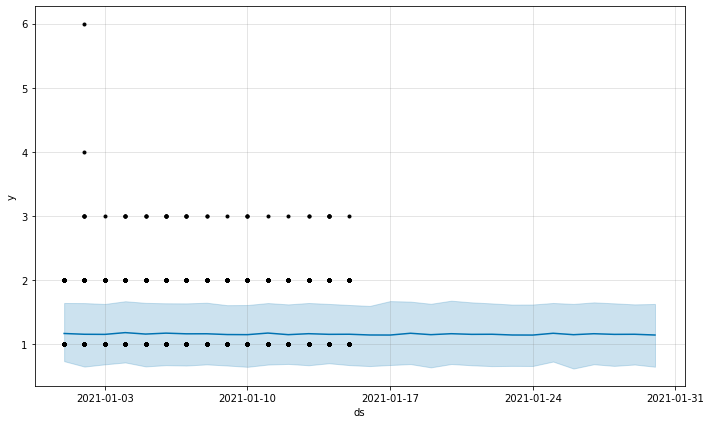

In [15]:
fig1 = model.plot(forecast)

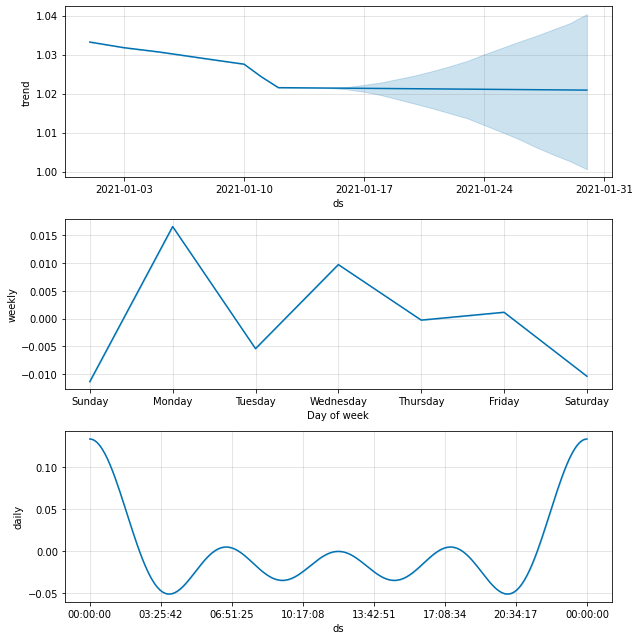

In [16]:
comp = model.plot_components(forecast)

In [17]:
results
results['error'] = results['y'] - results['yhat'] 
results['uncertainity'] = results['yhat_upper'] - results['yhat_lower']
#results[('yhat==NAN')]

In [18]:
results[results['error'].abs()>1*results['uncertainity']]

,y,yhat,yhat_lower,yhat_upper,error,uncertainity
ds,,,,,,
2021-01-02,3,1.155712,0.651674,1.642096,1.844288,0.990422
2021-01-02,3,1.155712,0.651674,1.642096,1.844288,0.990422
2021-01-02,6,1.155712,0.651674,1.642096,4.844288,0.990422
2021-01-02,3,1.155712,0.651674,1.642096,1.844288,0.990422
2021-01-02,4,1.155712,0.651674,1.642096,2.844288,0.990422
...,...,...,...,...,...,...
2021-01-29,3,1.155672,0.683917,1.621827,1.844328,0.937910
2021-01-30,3,1.144111,0.649510,1.628582,1.855889,0.979072
2021-01-30,3,1.144111,0.649510,1.628582,1.855889,0.979072


In [19]:
results['anomaly'] = results.apply(lambda x: 'Yes' if(np.abs(x['error'])>2.2*x['uncertainity']) else 'No',axis=1)
results
results[(results.yhat=='NaN')]

,y,yhat,yhat_lower,yhat_upper,error,uncertainity,anomaly
ds,,,,,,,


In [20]:
fig = px.scatter(results.reset_index(), x='ds', y='y', labels={
                     "ds": "ds (days)",
                     "y": "y (views)"
                      }
                 , color='anomaly',title='Agent Total Views Per Customer')
fig.show()

In [21]:
newdf = results[(results.anomaly=="Yes")]
newdf



,y,yhat,yhat_lower,yhat_upper,error,uncertainity,anomaly
ds,,,,,,,
2021-01-02,6,1.155712,0.651674,1.642096,4.844288,0.990422,Yes
2021-01-02,4,1.155712,0.651674,1.642096,2.844288,0.990422,Yes


# Standard Deviation Approach


In [32]:
std_dev = results['y'].std()
print(std_dev)

mean = results['y'].mean()
print(mean)


threshold = mean + (5*std_dev)
results['anomaly2'] = results.apply(lambda x: 'Yes' if(x['y'] > threshold) else 'No',axis=1)
results


0.3725509957801877
1.158196921573418


,y,yhat,yhat_lower,yhat_upper,error,uncertainity,anomaly,anomaly2
ds,,,,,,,,
2021-01-01,1,1.167963,0.736344,1.643669,-0.167963,0.907325,No,No
2021-01-01,1,1.167963,0.736344,1.643669,-0.167963,0.907325,No,No
2021-01-01,1,1.167963,0.736344,1.643669,-0.167963,0.907325,No,No
2021-01-01,1,1.167963,0.736344,1.643669,-0.167963,0.907325,No,No
2021-01-01,2,1.167963,0.736344,1.643669,0.832037,0.907325,No,No
...,...,...,...,...,...,...,...,...
2021-01-30,1,1.144111,0.649510,1.628582,-0.144111,0.979072,No,No
2021-01-30,1,1.144111,0.649510,1.628582,-0.144111,0.979072,No,No
2021-01-30,1,1.144111,0.649510,1.628582,-0.144111,0.979072,No,No


In [34]:
fig = px.scatter(results.reset_index(), x='ds', y='y', color='anomaly2',labels={
                     "ds": "ds (days)",
                     "y": "y (views)"
                      },title='Agent Total Views Per Customer')
fig.show()